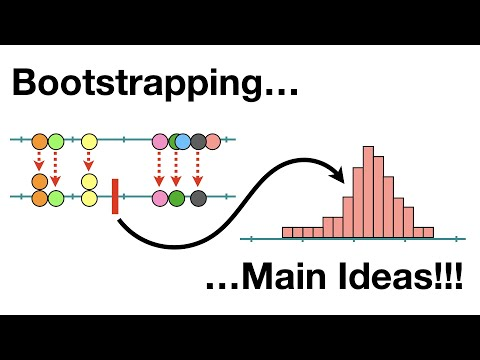

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('Xz0x-8-cgaQ', width=800, height=500)


1)
SD: The standard deviation measures the variance from the set of data points to the mean. A high standard deviation value means that data points are spread a lot more spread out, (farther from the mean) while a lower standard deviation value refers to point being plotted closer together towards the mean. These values stem from the ORIGINAL data set. 

SEM: Measures the precision of the sample mean in relation to the true POPULATION mean. We can get a better idea of what the population mean is the larger our sample size is. 

Thus, SD reflects the variability of the individual data plots within the sample compared to the SEM where variability is measured from the sample mean as as an estimate of the true population. 

Within bootstrapping, the SEM is obtained from the distribution of means generated by resampling with replacement and independent data. 

2)
If we are assuming that our data set follows a normal distribution, we must first calculate the sample mean. We then calculate our standard deviation. We must first take the summation of all data points subtracted by the sample mean divided by the sample size. This value is our variance, taking the square root of that value will generate the standard deviation. 

Using the standard deviation we can substiute this into the formula to find the standard error of the mean. Next we look at the z=score table to find which value correlates to either the 97.5th percentile or the 2.5th percentile. Both of these values will generate a confidence interval of 95%. 

3) 
In order to calculate a 95% confidence interval of the boostrapped data for sample means. We must look at the specific quartiles of data more specifically we look at the 2.5th and the 97.5th percentile. (97.5 - 2.5 is equal to 95)

In [ ]:
import numpy as np

def bootstrap_ci(data, num_resamples=1000, ci=0.95):
    np.random.seed(42)  # For reproducibility
    means = []

    # Bootstrap resampling
    for _ in range(num_resamples):
        resample = np.random.choice(data, size=len(data), replace=True)
        means.append(np.mean(resample))

    # Calculate the percentiles for the confidence interval
    lower_percentile = (1 - ci) / 2 * 100
    upper_percentile = (1 + ci) / 2 * 100
    lower_bound = np.percentile(means, lower_percentile)
    upper_bound = np.percentile(means, upper_percentile)

    return lower_bound, upper_bound

# Example usage
data = [3.4, 2.8, 4.2, 5.1, 3.3, 4.8, 3.9, 4.5]
lower, upper = bootstrap_ci(data)
print(f"95% Bootstrap Confidence Interval: ({lower:.2f}, {upper:.2f})")


#we can change the code to calculate other parameters by accessing the numpy library such as np.median or np.var
#np.median will calculate the median
#np.var will calculate the variance

5)
In terms of confidence intervals, population parameters are fixed values that describe a characteristic of the entire data population compared to sample statistics that give an estimation of where the true population parameter lies. 

6a)
The process of bootstrapping requires you to create an original sample data set. Then resample with replacement, meaning to create another data set from the original sample data, but having the option to randomly select values from the data. With replacement means that there is a possibility that data values are either chosen multiple times or none at all. 

This process is done a large number amount of times. Within each resample, sample statistics parameters are calculated and then placed within confidence intervals to give rough estimates of what the true population parameters are. 

6b)
The main purpose of bootstrapping is to provide an efficient way to get a rough estimate of the true population parameters from one data set. Since majority of the time, we do not have access to the entire population, nor do we often have the resources to conduct multiple data sets, bootstrapping allows us to create our own hypothetical sample using one data set. 

6c) 
Using the sample of size n from the population, I would bootstrap a large number of resamples. Then, I would calculate the average in each of them and compare them within a confidence interval. A confidence interval will tell me the variance in the means, and that depending on the confidence interval percentage, that out of the percentage of the resamples, they either contain the true population or they don't. This can then be used to reflect on my original guess, and determine if my guess falls within the variance range, and whether or not my guess is one of the simulations that has the true population parameter.

7)
For a confidence interval to "fail to reject the null hypothesis" means that there is a possibility of the true population mean being equivalent to zero. Since this is a possibility, the confidence interval is not able to remove this possibility. 

For a confidence interval to reject the null hypothesis is when zero is not included within the variance, making it impossible for the mean to even be zero. THus, since there is no possibiltty of it being zero, we do not need to entertain any thoughts of the true population mean being equal to zero. 

Chatlog summary - https://chatgpt.com/share/66fe0eca-d9cc-8011-88c3-e2f5687896c3

`-----------------------------------------------------------------------------------------------------------------------------`

Assignment Report:
Abstract: 


Introduction:
This report will take one sample of data, and determine whether or not the vaccine is effective or not. Effectiveness will be determined through an initial health score, and a final health score. A higher health score can suggest that the vaccine is effective or not, however, we must take into consideration the patient's initial health score. The difference in health score is an indicator of health effectiveness. We must also be wary of a potential null hypothesis which can be referred to as a 'no effect' value indicating that the drug did not change the patient's health. 

Methods:
In order to analyze whether or not the vaccine was effective or not, we will be using bootstrapping to simulate resampling. The first bootstrapping that will be done will be with all 10 patients, then followed by bootstrapping for individual genders. By testing individual genders we can draw conclusions on whether or not the vaccine is influenced by a person's gender. Finally, we can create bins for the age demographic of the patient's and bootstrap from there in order to determine if age plays a role in the vaccine's effectiveness. 

Using a histogram can tell us the frequency of the bootstrapped sample means while putting confidence intervals around the plot can tell us where our potential null hypothesis will be. 

Box plots can help us visualize the IQRs of the dataset. 

In [5]:
import pandas as pd

# Load the dataset to examine its structure
df = pd.read_csv("patient_health_data.csv")
df

,PatientID,Age,Gender,InitialHealthScore,FinalHealthScore
0,1,45,M,84,86
1,2,34,F,78,86
2,3,29,M,83,80
3,4,52,F,81,86
4,5,37,M,81,84
5,6,41,F,80,86
6,7,33,M,79,86
7,8,48,F,85,82
8,9,26,M,76,83
9,10,39,F,83,84


In [10]:
import pandas as pd

# Load the dataset to examine its structure
df = pd.read_csv("patient_health_data.csv")

df.describe()

,PatientID,Age,InitialHealthScore,FinalHealthScore
count,10.00000,10.00000,10.000000,10.000000
mean,5.50000,38.40000,81.000000,84.300000
std,3.02765,8.30261,2.828427,2.110819
min,1.00000,26.00000,76.000000,80.000000
25%,3.25000,33.25000,79.250000,83.250000
50%,5.50000,38.00000,81.000000,85.000000
75%,7.75000,44.00000,83.000000,86.000000
max,10.00000,52.00000,85.000000,86.000000


`==========================================================CODE===========================================================----`


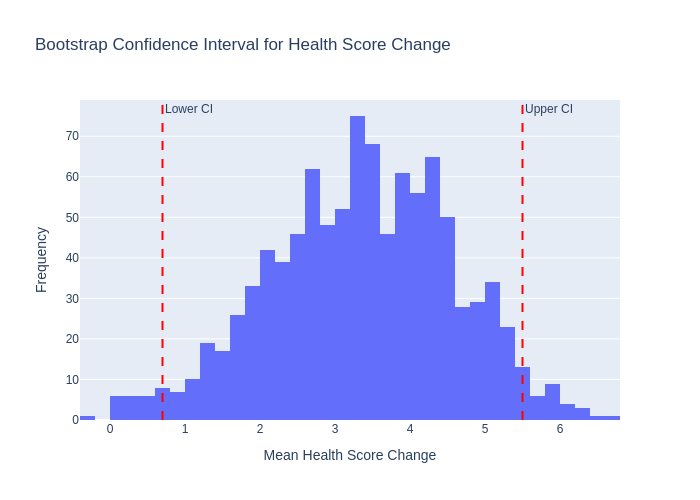

In [4]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go

# Data Set
df = df = pd.read_csv("patient_health_data.csv")

# Calculate the health score change
df['HealthScoreChange'] = df['FinalHealthScore'] - df['InitialHealthScore']

# Set a random seed for reproducibility
np.random.seed(42)

# Define a function to bootstrap the mean of HealthScoreChange
def bootstrap(data, num_samples=1000):
    means = np.empty(num_samples)
    n = len(data)
    
    for i in range(num_samples):
        sample = np.random.choice(data, size=n, replace=True)
        means[i] = np.mean(sample)
    
    return means

# Perform bootstrap on HealthScoreChange
bootstrap_means = bootstrap(df['HealthScoreChange'].values)

# Calculate the confidence interval (95%)
conf_interval = np.percentile(bootstrap_means, [2.5, 97.5])

# Create the plot with Plotly
fig = go.Figure()

# Add the histogram of bootstrap means
fig.add_trace(go.Histogram(x=bootstrap_means, nbinsx=50, name='Bootstrap Means'))

# Add lines for the confidence interval
fig.add_vline(x=conf_interval[0], line_width=2, line_dash="dash", line_color="red", annotation_text="Lower CI")
fig.add_vline(x=conf_interval[1], line_width=2, line_dash="dash", line_color="red", annotation_text="Upper CI")

# Add title and labels
fig.update_layout(
    title='Bootstrap Confidence Interval for Health Score Change',
    xaxis_title='Mean Health Score Change',
    yaxis_title='Frequency',
    showlegend=False
)

# Save the figure as a PNG file
fig.show(renderer = 'png')


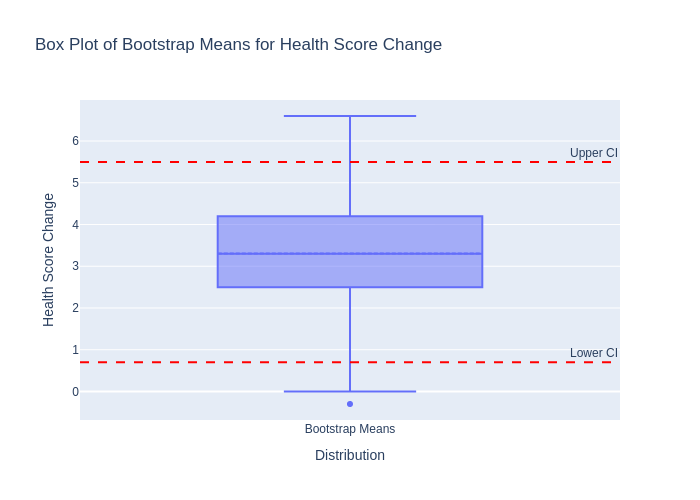

In [1]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go

#dataset
df = pd.read_csv("patient_health_data.csv")

# Calculate the health score change
df['HealthScoreChange'] = df['FinalHealthScore'] - df['InitialHealthScore']

# Set a random seed for reproducibility
np.random.seed(42)

# Define a function to bootstrap the mean of HealthScoreChange
def bootstrap(data, num_samples=1000):
    means = np.empty(num_samples)
    n = len(data)
    
    for i in range(num_samples):
        sample = np.random.choice(data, size=n, replace=True)
        means[i] = np.mean(sample)
    
    return means

# Perform bootstrap on HealthScoreChange
bootstrap_means = bootstrap(df['HealthScoreChange'].values)

# Calculate the confidence interval (95%)
conf_interval = np.percentile(bootstrap_means, [2.5, 97.5])

# Create the box plot for the bootstrap means
fig = go.Figure()

# Add the box plot
fig.add_trace(go.Box(y=bootstrap_means, name='Bootstrap Means', boxmean=True))

# Add lines for the confidence interval
fig.add_hline(y=conf_interval[0], line_width=2, line_dash="dash", line_color="red", annotation_text="Lower CI")
fig.add_hline(y=conf_interval[1], line_width=2, line_dash="dash", line_color="red", annotation_text="Upper CI")

# Add title and labels
fig.update_layout(
    title='Box Plot of Bootstrap Means for Health Score Change',
    xaxis_title='Distribution',
    yaxis_title='Health Score Change',
    showlegend=False
)

# Show the plot
fig.show(renderer = 'png')

# Save the box plot as a PNG file
fig.write_image("bootstrap_box_plot.png")


In [1]:
import pandas as pd

# Load the dataset to examine its structure
df = pd.read_csv("patient_health_data.csv")
df

,PatientID,Age,Gender,InitialHealthScore,FinalHealthScore
0,1,45,M,84,86
1,2,34,F,78,86
2,3,29,M,83,80
3,4,52,F,81,86
4,5,37,M,81,84
5,6,41,F,80,86
6,7,33,M,79,86
7,8,48,F,85,82
8,9,26,M,76,83
9,10,39,F,83,84


In [2]:
male_df = df[df['Gender'] == 'M']
female_df = df[df['Gender'] == 'F']

female_df

,PatientID,Age,Gender,InitialHealthScore,FinalHealthScore
1,2,34,F,78,86
3,4,52,F,81,86
5,6,41,F,80,86
7,8,48,F,85,82
9,10,39,F,83,84


In [12]:
female_df.describe()

,PatientID,Age,InitialHealthScore,FinalHealthScore
count,5.000000,5.000000,5.000000,5.000000
mean,6.000000,42.800000,81.400000,84.800000
std,3.162278,7.190271,2.701851,1.788854
min,2.000000,34.000000,78.000000,82.000000
25%,4.000000,39.000000,80.000000,84.000000
50%,6.000000,41.000000,81.000000,86.000000
75%,8.000000,48.000000,83.000000,86.000000
max,10.000000,52.000000,85.000000,86.000000


In [3]:
male_df

,PatientID,Age,Gender,InitialHealthScore,FinalHealthScore
0,1,45,M,84,86
2,3,29,M,83,80
4,5,37,M,81,84
6,7,33,M,79,86
8,9,26,M,76,83


In [11]:
male_df.describe()

,PatientID,Age,InitialHealthScore,FinalHealthScore
count,5.000000,5.000000,5.000000,5.00000
mean,5.000000,34.000000,80.600000,83.80000
std,3.162278,7.416198,3.209361,2.48998
min,1.000000,26.000000,76.000000,80.00000
25%,3.000000,29.000000,79.000000,83.00000
50%,5.000000,33.000000,81.000000,84.00000
75%,7.000000,37.000000,83.000000,86.00000
max,9.000000,45.000000,84.000000,86.00000


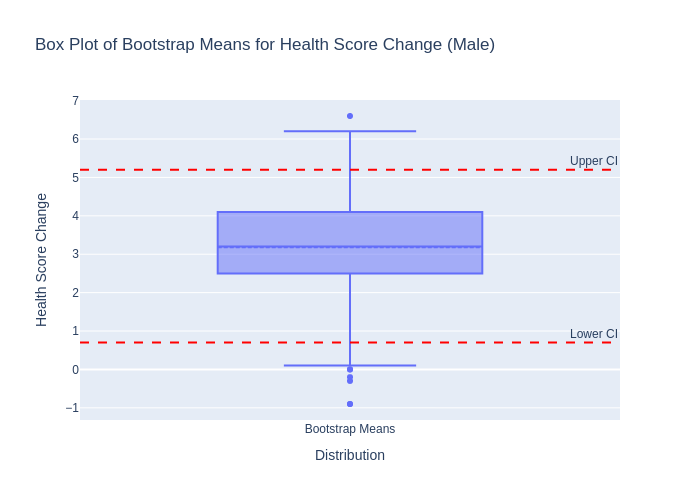

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

# Load the dataset to examine its structure
df = pd.read_csv("patient_health_data.csv")
df

male_df = df[df['Gender'] == 'M'].copy()

# Calculate the health score change
male_df['HealthScoreChange'] = male_df['FinalHealthScore'] - male_df['InitialHealthScore']

# Set a random seed for reproducibility
np.random.seed(42)

# Define a function to bootstrap the mean of HealthScoreChange
def bootstrap(data, num_samples=1000):
    means = np.empty(num_samples)
    n = 10  
    #the male data set only has 5 people but we are going to have a sample size of 10 since that is what the original data had
    
    for i in range(num_samples):
        sample = np.random.choice(data, size=n, replace=True)
        means[i] = np.mean(sample)
    
    return means

# Perform bootstrap on HealthScoreChange
bootstrap_means = bootstrap(male_df['HealthScoreChange'].values)

# Calculate the confidence interval (95%)
conf_interval = np.percentile(bootstrap_means, [2.5, 97.5])

# Create the box plot for the bootstrap means
fig = go.Figure()

# Add the box plot
fig.add_trace(go.Box(y=bootstrap_means, name='Bootstrap Means', boxmean=True))

# Add lines for the confidence interval
fig.add_hline(y=conf_interval[0], line_width=2, line_dash="dash", line_color="red", annotation_text="Lower CI")
fig.add_hline(y=conf_interval[1], line_width=2, line_dash="dash", line_color="red", annotation_text="Upper CI")

# Add title and labels
fig.update_layout(
    title='Box Plot of Bootstrap Means for Health Score Change (Male)',
    xaxis_title='Distribution',
    yaxis_title='Health Score Change',
    showlegend=False
)

# Show the plot
fig.show(renderer = 'png')

# Save the box plot as a PNG file
fig.write_image("bootstrap_box_plot.png")



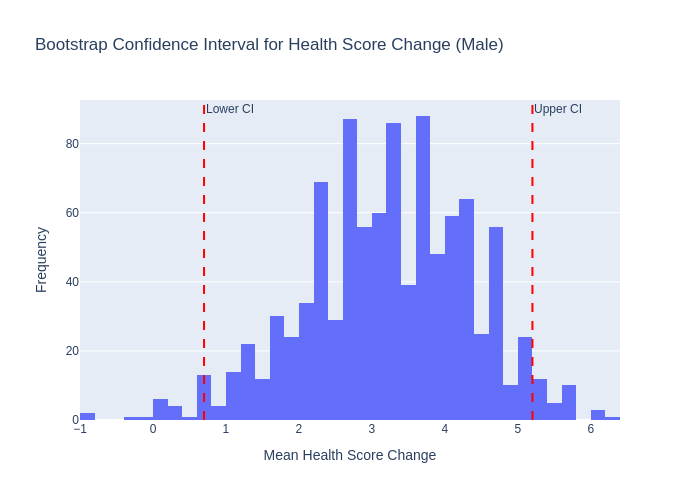

array([0.7, 5.2])

In [25]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

# Load the dataset to examine its structure
df = pd.read_csv("patient_health_data.csv")
df

male_df = df[df['Gender'] == 'M'].copy()

# Calculate the health score change
male_df['HealthScoreChange'] = male_df['FinalHealthScore'] - male_df['InitialHealthScore']

# Set a random seed for reproducibility
np.random.seed(42)

# Define a function to bootstrap the mean of HealthScoreChange
def bootstrap(data, num_samples=1000):
    means = np.empty(num_samples)
    n = 10  
    #the male data set only has 5 people but we are going to have a sample size of 10 since that is what the original data had
    
    for i in range(num_samples):
        sample = np.random.choice(data, size=n, replace=True)
        means[i] = np.mean(sample)
    
    return means

# Perform bootstrap on HealthScoreChange
bootstrap_means = bootstrap(male_df['HealthScoreChange'].values)

# Calculate the confidence interval (95%)
conf_interval = np.percentile(bootstrap_means, [2.5, 97.5])

# Create the plot with Plotly
fig = go.Figure()

# Add the histogram of bootstrap means
fig.add_trace(go.Histogram(x=bootstrap_means, nbinsx=50, name='Bootstrap Means'))

# Add lines for the confidence interval
fig.add_vline(x=conf_interval[0], line_width=2, line_dash="dash", line_color="red", annotation_text="Lower CI")
fig.add_vline(x=conf_interval[1], line_width=2, line_dash="dash", line_color="red", annotation_text="Upper CI")

# Add title and labels
fig.update_layout(
    title='Bootstrap Confidence Interval for Health Score Change (Male)',
    xaxis_title='Mean Health Score Change',
    yaxis_title='Frequency',
    showlegend=False
)

# Save the figure as a PNG file
fig.show(renderer = 'png')

conf_interval

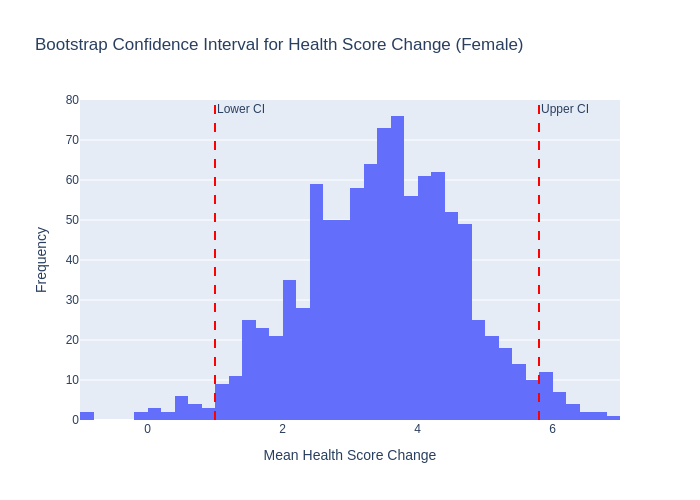

array([1. , 5.8])

In [24]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

# Load the dataset to examine its structure
df = pd.read_csv("patient_health_data.csv")

# Filter the dataset for female patients
female_df = df[df['Gender'] == 'F'].copy()

# Calculate the health score change
female_df['HealthScoreChange'] = female_df['FinalHealthScore'] - female_df['InitialHealthScore']

# Set a random seed for reproducibility
np.random.seed(42)

# Define a function to bootstrap the mean of HealthScoreChange
def bootstrap(data, num_samples=1000):
    means = np.empty(num_samples)
    n = 10
    
    for i in range(num_samples):
        sample = np.random.choice(data, size=n, replace=True)
        means[i] = np.mean(sample)
    
    return means

# Perform bootstrap on HealthScoreChange
bootstrap_means = bootstrap(female_df['HealthScoreChange'].values)

# Calculate the confidence interval (95%)
conf_interval = np.percentile(bootstrap_means, [2.5, 97.5])

# Create the plot with Plotly
fig = go.Figure()

# Add the histogram of bootstrap means
fig.add_trace(go.Histogram(x=bootstrap_means, nbinsx=50, name='Bootstrap Means'))

# Add lines for the confidence interval
fig.add_vline(x=conf_interval[0], line_width=2, line_dash="dash", line_color="red", annotation_text="Lower CI")
fig.add_vline(x=conf_interval[1], line_width=2, line_dash="dash", line_color="red", annotation_text="Upper CI")

# Add title and labels
fig.update_layout(
    title='Bootstrap Confidence Interval for Health Score Change (Female)',
    xaxis_title='Mean Health Score Change',
    yaxis_title='Frequency',
    showlegend=False
)

# Save the figure as a PNG file
fig.show(renderer = 'png')

conf_interval

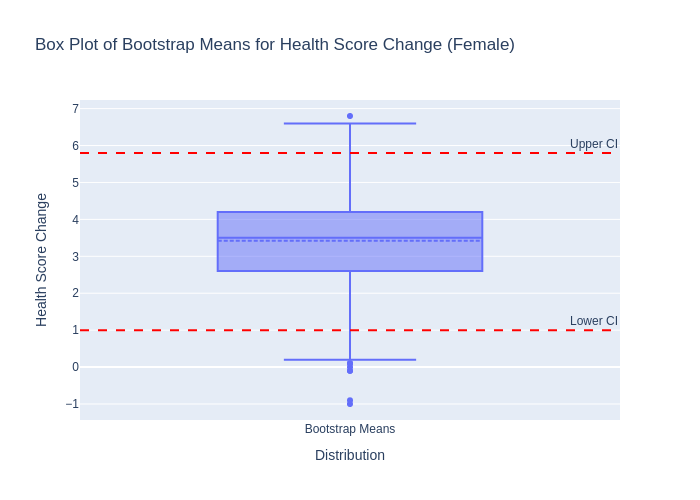

array([1. , 5.8])

In [3]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

# Load the dataset to examine its structure
df = pd.read_csv("patient_health_data.csv")

# Filter the dataset for female patients
female_df = df[df['Gender'] == 'F'].copy()

# Calculate the health score change
female_df['HealthScoreChange'] = female_df['FinalHealthScore'] - female_df['InitialHealthScore']

# Set a random seed for reproducibility
np.random.seed(42)

# Define a function to bootstrap the mean of HealthScoreChange
def bootstrap(data, num_samples=1000):
    means = np.empty(num_samples)
    n = 10
    
    for i in range(num_samples):
        sample = np.random.choice(data, size=n, replace=True)
        means[i] = np.mean(sample)
    
    return means

# Perform bootstrap on HealthScoreChange
bootstrap_means = bootstrap(female_df['HealthScoreChange'].values)

# Calculate the confidence interval (95%)
conf_interval = np.percentile(bootstrap_means, [2.5, 97.5])

# Create the box plot for the bootstrap means
fig = go.Figure()

# Add the box plot
fig.add_trace(go.Box(y=bootstrap_means, name='Bootstrap Means', boxmean=True))

# Add lines for the confidence interval
fig.add_hline(y=conf_interval[0], line_width=2, line_dash="dash", line_color="red", annotation_text="Lower CI")
fig.add_hline(y=conf_interval[1], line_width=2, line_dash="dash", line_color="red", annotation_text="Upper CI")

# Add title and labels
fig.update_layout(
    title='Box Plot of Bootstrap Means for Health Score Change (Female)',
    xaxis_title='Distribution',
    yaxis_title='Health Score Change',
    showlegend=False
)

# Show the plot
fig.show(renderer = 'png')

# Save the box plot as a PNG file
fig.write_image("bootstrap_box_plot.png")

conf_interval

Chatlog summary: https://chatgpt.com/share/66ff4648-3c34-8011-b459-11ad45c0a748


`-------------------------------------------------Discussion------------------------------------------------------------------`

In order to determine if our vaccine was effective, I think it is best that we set a foundation to determine what effective really means, it is not just as simple as simply saying did the vaccine work. A vaccine that is ineffective can be determined  by looking at a patient's final health. Without doing any sorts of sample statistics, an eye ball test and some subtraction can help give an introductory response to the vaccine's effect. In doing so, we can say that eight out of the ten patients from the original data set (no bootstrap) benefited from the vaccine. Next, when determining effectiveness, how large should the difference be for the vaccine to be considered effective. If we consider a health score change of only one, then it is quite easy to say that the vaccine is effective. But for now, since the final health score sample mean was 84.3, and the initial health score was 81, let's say that the vaccine's effectiveness must show a health score difference of a minimum of 3 points.

Since our original data set only contains 10 people, it is quite hard to concretely decide if the vaccine is effective. Thus, we turn to bootstrapping, where we are able to simulate the data set using resampling with replacement in order to generate a larger number of data. 

When we look at 'Bootstrap confidence Interval for Health Score Change' we are told that within a 95% confidence interval, the true population mean lies somewhere between 0.7 and 5.5, or in other words, the true population sample mean is either within the intervals or not. However, since our confidence interval has its lower bounds equivalent to 0.7, we can safely reject the null hypothesis, as there is no empirical reason to believe the hypothetical value. 
Looking back at the drug's effectiveness, when it spans a demographic of both female and males, we see that the median has a value of 3.3, which is a quick indicator of saying that at least 50% of the sample means over 1000 resamples shows that the vaccine was effective. We can go even further to find the exact percentile that houses the value 3, which in this case is equal to the 38th percentile. Meaning over 62% of the bootstrapped sample means indicate the the drug is effective. 

Another way we can breakdown the vaccine's effectiveness is to sort between genders. Since the original bootstrapping included 10 samples with 5 being Male and 5 being Female, we also have no clue if the gender plays any part of the data set. 

Thus, let's look at the bootstrapped data first for males. As done before, we must look at the confidence interval to determine if we must reject the null hypothesis or not. In this case, we have a lower bound equivalent to 0.7 which allows us to reject the null hypothesis once again. Next, looking at the median can tell us the vaccine's effectiveness, which in case came out to be a value of 3.2. Going to the exact percentiles, we can see that at the 41th percentile, 59% of the bootstrapped sample means showcased a value greater than or equal to 3, which we can say that the vaccine was effective for males. 

When observing female data, our confidence of (1,5.8) tells us once again that we can reject the null hypothesis. However, already judging from the scores, we can create an observation that the vaccine has greater effects on females, as we have not only a lower and an upper bound of the confidence interval being greater than its male counterparts, but the median and the percentage of the data as well. With 66% of the data for females being at least equal or greater than 3, the drug showcases a solid degree of effectiveness.  

Knowing this, when observing our original bootstrapped, we can also make note of a small observation that the data might be influenced by the number of females within each sample due to an estimation that the vaccine works better on females. 

When making estimates of the vaccine's effect to a population, we can say that because of the confidence intervals for both the original data, male, and the female specific data sets, there is a good chance that the vaccine is effective. 